In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_excel('Train.xlsx')
print(df.shape)
df.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
def change_to(col):
    df[col]=pd.to_datetime(df[col])

In [7]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to(i)

In [8]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-07 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-07 05:50:00,2021-04-07 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-07 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-07 18:05:00,2021-04-07 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-07 16:50:00,2021-04-07 21:35:00,4h 45m,1 stop,No info,13302


In [10]:
df['Journey_day']=df['Date_of_Journey'].dt.day
df['Journey_month']=df['Date_of_Journey'].dt.month

In [11]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-04-07 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-07 05:50:00,2021-04-07 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-07 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-07 18:05:00,2021-04-07 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-07 16:50:00,2021-04-07 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [13]:
def ext_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
def ext_min(df,col):
    df[col+'_min']=df[col].dt.minute
def drp(df,col):
    df.drop(col,axis=1,inplace=True)

In [14]:
ext_hour(df,'Dep_Time')
ext_min(df,'Dep_Time')
drp(df,'Dep_Time')

ext_hour(df,'Arrival_Time')
ext_min(df,'Arrival_Time')
drp(df,'Arrival_Time')

In [15]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [16]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' '+'0m'
        else:
            duration[i]='0h'+' '+duration[i]

In [17]:
df['Duration']=duration

In [18]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [19]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [20]:
df['Duration_hour'] = df['Duration'].apply(hour)
df['Duration_minute'] = df['Duration'].apply(minute)

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [22]:
df.drop('Duration',axis=1,inplace=True)

In [23]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour        object
Duration_minute      object
dtype: object

In [24]:
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_minute']=df['Duration_minute'].astype(int)

In [25]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour         int32
Duration_minute       int32
dtype: object

In [26]:
cat=[col for col in df.columns if df[col].dtype=='O']

In [27]:
cont=[col for col in df.columns if df[col].dtype!='O']

In [28]:
dc=df[cat]
dcn=df[cont]

In [29]:
dcn.head()

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45


In [30]:
dc.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [31]:
dc['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [32]:
import seaborn as sns

<AxesSubplot:xlabel='Airline', ylabel='Price'>

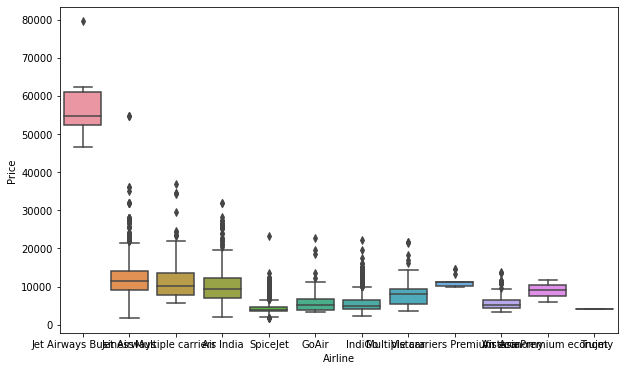

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

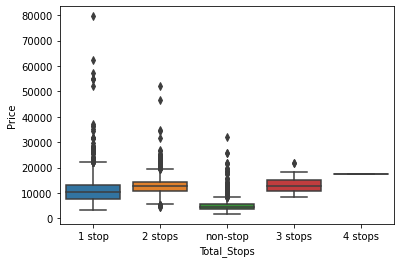

In [34]:
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [35]:
Airline=pd.get_dummies(dc['Airline'],drop_first=True)

In [36]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [37]:
dc['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

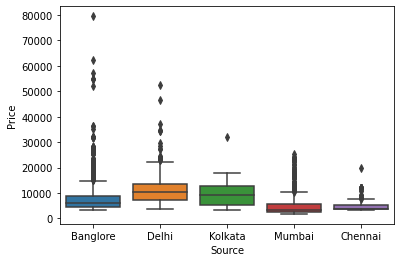

In [38]:
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [39]:
Source=pd.get_dummies(dc['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [40]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

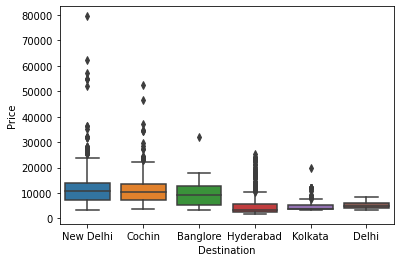

In [41]:
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [42]:
Destination=pd.get_dummies(dc['Destination'],drop_first=True)

In [43]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [44]:
dc.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [45]:
df['Route_1']=dc['Route'].str.split('→').str[0]
df['Route_2']=dc['Route'].str.split('→').str[1]
df['Route_3']=dc['Route'].str.split('→').str[2]
df['Route_4']=dc['Route'].str.split('→').str[3]
df['Route_5']=dc['Route'].str.split('→').str[4]

In [46]:
df.drop('Route',axis=1,inplace=True)

In [47]:
df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Price                    0
Journey_day              0
Journey_month            0
Dep_Time_hour            0
Dep_Time_min             0
Arrival_Time_hour        0
Arrival_Time_min         0
Duration_hour            0
Duration_minute          0
Route_1                  0
Route_2                  0
Route_3               3491
Route_4               9116
Route_5              10636
dtype: int64

In [48]:
for i in ['Route_3','Route_4','Route_5']:
    df[i].fillna('None',inplace =True)

In [49]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Price                0
Journey_day          0
Journey_month        0
Dep_Time_hour        0
Dep_Time_min         0
Arrival_Time_hour    0
Arrival_Time_min     0
Duration_hour        0
Duration_minute      0
Route_1              0
Route_2              0
Route_3              0
Route_4              0
Route_5              0
dtype: int64

In [50]:
dic={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(dic)

In [51]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,None,None


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    df[i]=le.fit_transform(df[i])

In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45,0,34,8,13,5


In [55]:
df=pd.concat([df,Airline,Source,Destination],axis=1)

In [56]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Duration_hour', 'Duration_minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [58]:
df=df.drop('Airline',axis=1)

In [59]:
df.drop('Source',axis=1,inplace=True)

In [60]:
df.head()

,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,New Delhi,0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Banglore,2,No info,7662,5,1,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Cochin,2,No info,13882,6,9,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,Banglore,1,No info,6218,5,12,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,New Delhi,1,No info,13302,3,1,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df.drop('Destination',axis=1,inplace =True)

In [62]:
df.head()

,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,No info,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662,5,1,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,No info,13882,6,9,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,No info,6218,5,12,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,No info,13302,3,1,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [63]:
pd.set_option('display.max_columns',25)
df.head()

,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Route_1,...,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,No info,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662,5,1,5,50,13,15,7,25,2,...,0,0,0,0,0,1,0,0,0,0,0,0
2,2,No info,13882,6,9,9,25,4,25,19,0,3,...,0,0,0,0,1,0,0,1,0,0,0,0
3,1,No info,6218,5,12,18,5,23,30,5,25,2,...,0,0,0,0,0,1,0,0,0,0,0,0
4,1,No info,13302,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
df.drop('Additional_Info',axis=1,inplace=True)

In [65]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Route_1,Route_2,...,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,13,...,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,2,25,...,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,3,32,...,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,2,34,...,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,34,...,0,0,0,0,0,0,0,0,0,0,0,1


In [66]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Duration_hour', 'Duration_minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [67]:
def plot(df,col):
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    sns.distplot(df[col])
    plt.subplot(2,1,2)
    sns.boxplot(df[col])

c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


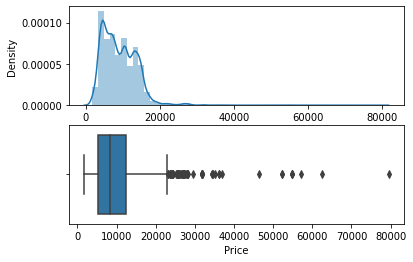

In [68]:
plot(df,'Price')

In [69]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


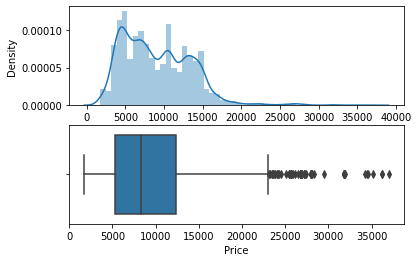

In [70]:
plot(df,'Price')

In [71]:
X=df.drop('Price',axis=1)
print(X.shape)
X.head()

(10682, 34)


,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,...,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,13,29,...,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,2,25,1,...,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,3,32,4,...,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,2,34,3,...,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,34,8,...,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
Y=df['Price']

In [73]:
Y.shape

(10682,)

In [74]:
from sklearn.feature_selection import mutual_info_classif

In [75]:
mutual_info_classif(X,Y)

array([2.15989839e+00, 1.06649226e+00, 8.72977731e-01, 1.42847822e+00,
       1.20925594e+00, 1.84782660e+00, 1.53365866e+00, 1.81468408e+00,
       1.09050498e+00, 2.02284294e+00, 2.76275353e+00, 2.25746641e+00,
       1.44679293e+00, 6.86057398e-01, 7.74917947e-01, 8.08392123e-02,
       6.61902793e-01, 9.20737710e-01, 4.29674617e-03, 5.73164068e-01,
       8.47152543e-03, 3.02474077e-01, 9.63313284e-04, 2.35433642e-01,
       1.36384602e-03, 1.85557937e-01, 1.52889971e+00, 8.86804613e-01,
       3.00755194e-01, 1.54230806e+00, 3.93776070e-01, 2.82471066e-01,
       1.72446279e-01, 3.77982416e-01])

In [76]:
imp=pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)

In [77]:
imp

,0
Total_Stops,2.132876
Journey_day,1.061288
Journey_month,0.889393
Dep_Time_hour,1.439886
Dep_Time_min,1.207116
Arrival_Time_hour,1.886503
Arrival_Time_min,1.543459
Duration_hour,1.786358
Duration_minute,1.078913
Route_1,2.071100


In [78]:
imp.columns=['import']
imp.sort_values('import',ascending=False)

,import
Route_2,2.858945
Route_3,2.284754
Total_Stops,2.132876
Route_1,2.071100
Arrival_Time_hour,1.886503
Duration_hour,1.786358
Delhi,1.577730
Cochin,1.574591
Arrival_Time_min,1.543459
Route_4,1.482968


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_t,x_t,Y_t,y_t=train_test_split(X,Y,test_size=0.2)

In [81]:
X_t.shape,Y_t.shape

((8545, 34), (8545,))

In [82]:
from sklearn import metrics

In [83]:
def predict(mdl):
    mdl.fit(X_t,Y_t)
    print('Training Score: {}'.format(mdl.score(X_t,Y_t)))
    pred=mdl.predict(x_t)
    print('Predicyions are {}'.format(pred))
    print('\n')
    r2=metrics.r2_score(y_t,pred)
    print('r2_score :{}'.format(r2))
    
    print('MAE:',metrics.mean_absolute_error(y_t,pred))
    print('MSE:',metrics.mean_squared_error(y_t,pred))
    print('RMAE:',np.sqrt(metrics.mean_absolute_error(y_t,pred)))
    sns.distplot(y_t-pred)

In [84]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9546737415662335
Predicyions are [ 5064.92       26849.98       29656.13       ... 15082.155
  8391.36       18653.34314286]


r2_score :0.8125234866510551
MAE: 1149.556237087433
MSE: 3567351.6207640385
RMAE: 33.905106357117255


c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


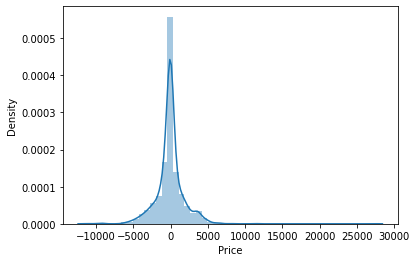

In [85]:
predict(RandomForestRegressor())

In [86]:
from sklearn.linear_model import LinearRegression

In [133]:
lr=LinearRegression()
lr.fit(X_t,Y_t)

LinearRegression()

Training Score: 0.6190835118079223
Predicyions are [ 6061.52339825 11914.2545233  15154.99194255 ...  9268.37232561
  9812.85023957 14536.76063736]


r2_score :0.6020073888960638
MAE: 1940.7033101053985
MSE: 7573106.416968303
RMAE: 44.05341428431397


c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


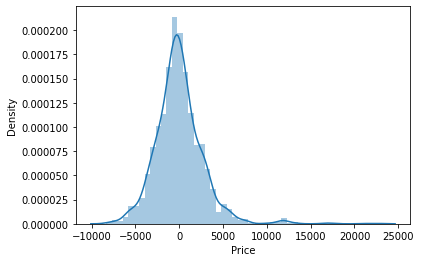

In [135]:
predict(LinearRegression())

AttributeError: 'LinearRegression' object has no attribute 'classes_'

In [88]:
from sklearn.neighbors import KNeighborsClassifier

Training Score: 0.46342890579286133
Predicyions are [ 4667. 17057. 11410. ...  5268.  8366. 13292.]


r2_score :0.42063710468822946
MAE: 1995.3977538605523
MSE: 11024267.129153019
RMAE: 44.66987523891859


c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


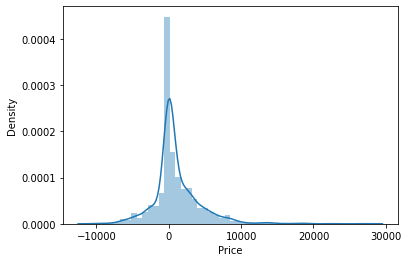

In [89]:
predict(KNeighborsClassifier())

In [91]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf=RandomForestRegressor()

In [101]:
param_grid={
    'bootstrap':[True],
    'max_depth':[80,90,100,110],
    'n_estimators':[100,200,300,1000],
    'max_features':[2,3],
    'min_samples_split':[8,10,12],
    'min_samples_leaf':[3,4,5]
}

In [102]:
rg=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)

In [103]:
rg.fit(X_t,Y_t)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [104]:
rg.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [126]:
bg=rg.best_estimator_
bg

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [117]:
rfr=RandomForestRegressor(bootstrap=True,max_depth=90,max_features=3,min_samples_leaf=3,min_samples_split=8,n_estimators=200)

In [118]:
rfr.fit(X_t,Y_t)


RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [119]:
pred=rfr.predict(x_t)

In [124]:
metrics.r2_score(y_t,pred)

0.7872457086614262

Training Score: 0.8494603221027879
Predicyions are [ 4932.85912126 15272.09052045 21408.41243623 ... 11986.0606372
  8813.99587333 15469.23809199]


r2_score :0.7862956317747648
MAE: 1346.3351627075815
MSE: 4066422.0319357575
RMAE: 36.69244013019006


c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


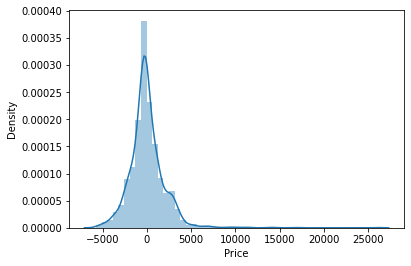

In [125]:
predict(rfr)